In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from joblib import dump

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
heart_data = pd.read_csv('heart.csv')

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
1021,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
1022,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
1023,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
1024,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1


In [6]:
heart_data.shape

(1025, 14)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [11]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1  0 ---> Defective Heart

1 < 0 ---> Healthy Heart

Splitting the Features and Target

In [12]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X_train)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
11    52    1   0       128   204    1        1      156      1      1.0   
272   51    0   0       130   305    0        1      142      1      1.2   
503   65    0   2       155   269    0        1      148      0      0.8   
744   41    1   2       112   250    0        1      179      0      0.0   
94    54    1   1       192   283    0        0      195      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
109   62    0   2       130   263    0        1       97      0      1.2   
965   34    0   1       118   210    0        1      192      0      0.7   
486   56    0   0       134   409    0        0      150      1      1.9   
468   57    1   0       165   289    1        0      124      0      1.0   
592   42    0   2       120   209    0        1      173      0      0.0   

     slope  ca  thal  
11       1   0     0  
272      1   0     3  
503      2   0    

In [13]:
print(y_train)

11     0
272    0
503    1
744    1
94     0
      ..
109    0
965    1
486    0
468    0
592    1
Name: target, Length: 820, dtype: int64


Splitting the Data into Training data & Test Data

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

Logistic Regression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train, y_train)

C:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
x_train_Prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_Prediction, y_train)

In [18]:
print("Accuracy on Training data : " , training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [19]:
x_test_Prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(x_test_Prediction, y_test)

In [20]:
print("Accuracy on Test data : ", test_data_accuracy)

Accuracy on Test data :  0.8585365853658536


In [21]:
input_data = (55,1,0,160,289,0,0,145,1,0.8,1,1,3)

input_data_as_numpy_array = np.asarray(input_data)

#reshaping numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

# Print prediction
if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

The Person does not have a Heart Disease


C:\Program Files\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Boxplot of a few features

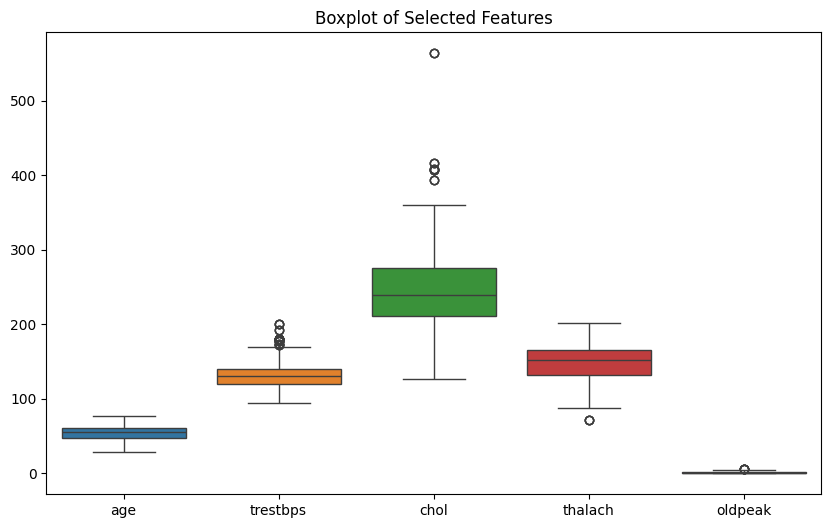

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Boxplot of Selected Features')
plt.show()

Pie Chart of target variable distribution

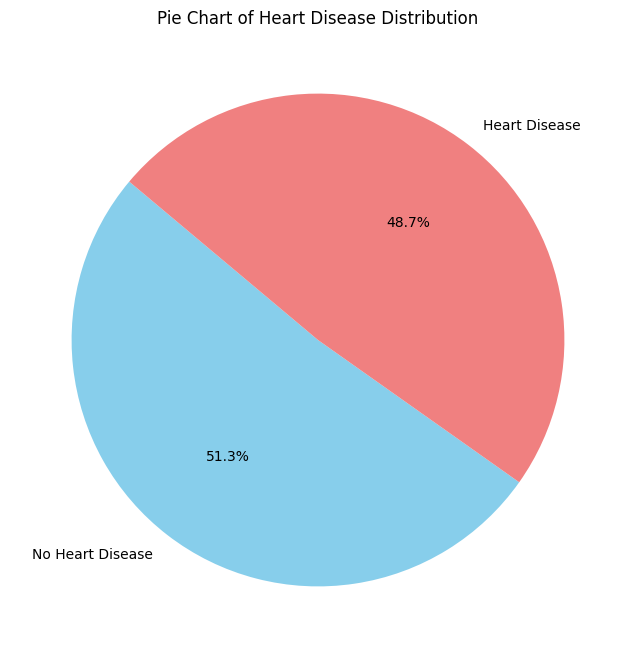

In [23]:
target_counts = heart_data['target'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Pie Chart of Heart Disease Distribution')
plt.show()

Bar Graph of target variable distribution

C:\Users\94775\AppData\Local\Temp\ipykernel_2860\1794107635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_data, palette=['skyblue', 'lightcoral'])


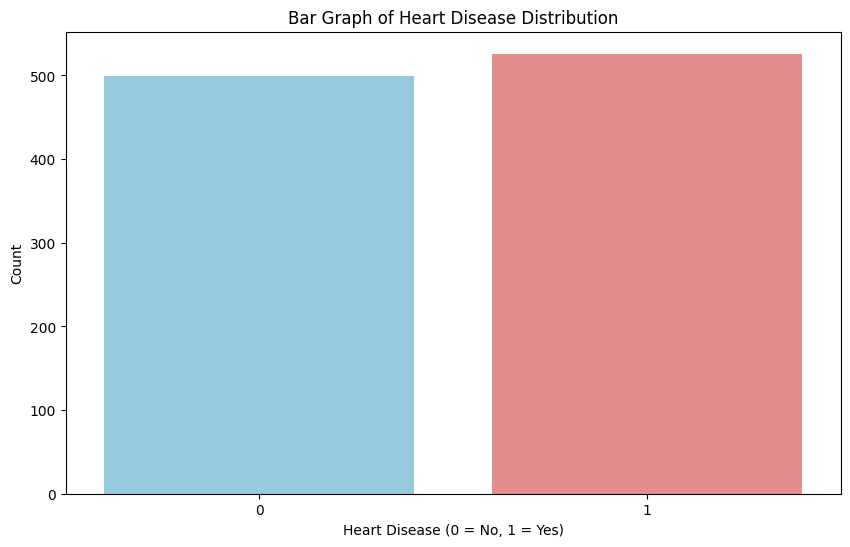

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=heart_data, palette=['skyblue', 'lightcoral'])
plt.title('Bar Graph of Heart Disease Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Heatmap of the correlation matrix

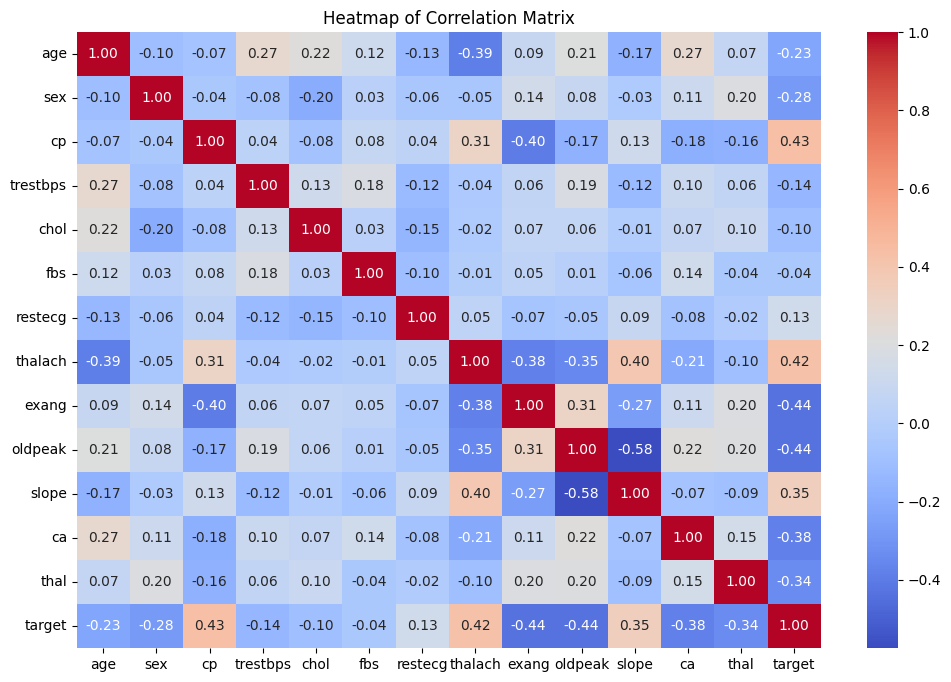

In [25]:
plt.figure(figsize=(12, 8))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [26]:
dump(model, 'heart_disease_model.joblib')

print("Model saved successfully!")

Model saved successfully!
